In [24]:

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [25]:
df = pd.read_csv('../../dataset1/time_series_covid19_confirmed_global.csv')
data = df.iloc[:, 4:]
state = df.iloc[:,0]
country = df.iloc[:,1]
last_data = data.iloc[:, -1]

In [26]:
index = 83 # 64 83 145 217 218 255 92
print("选择的国家是：{}".format(country[index]))
print("选择的地区是：{}".format(state[index]))

选择的国家是：China
选择的地区是：Shandong


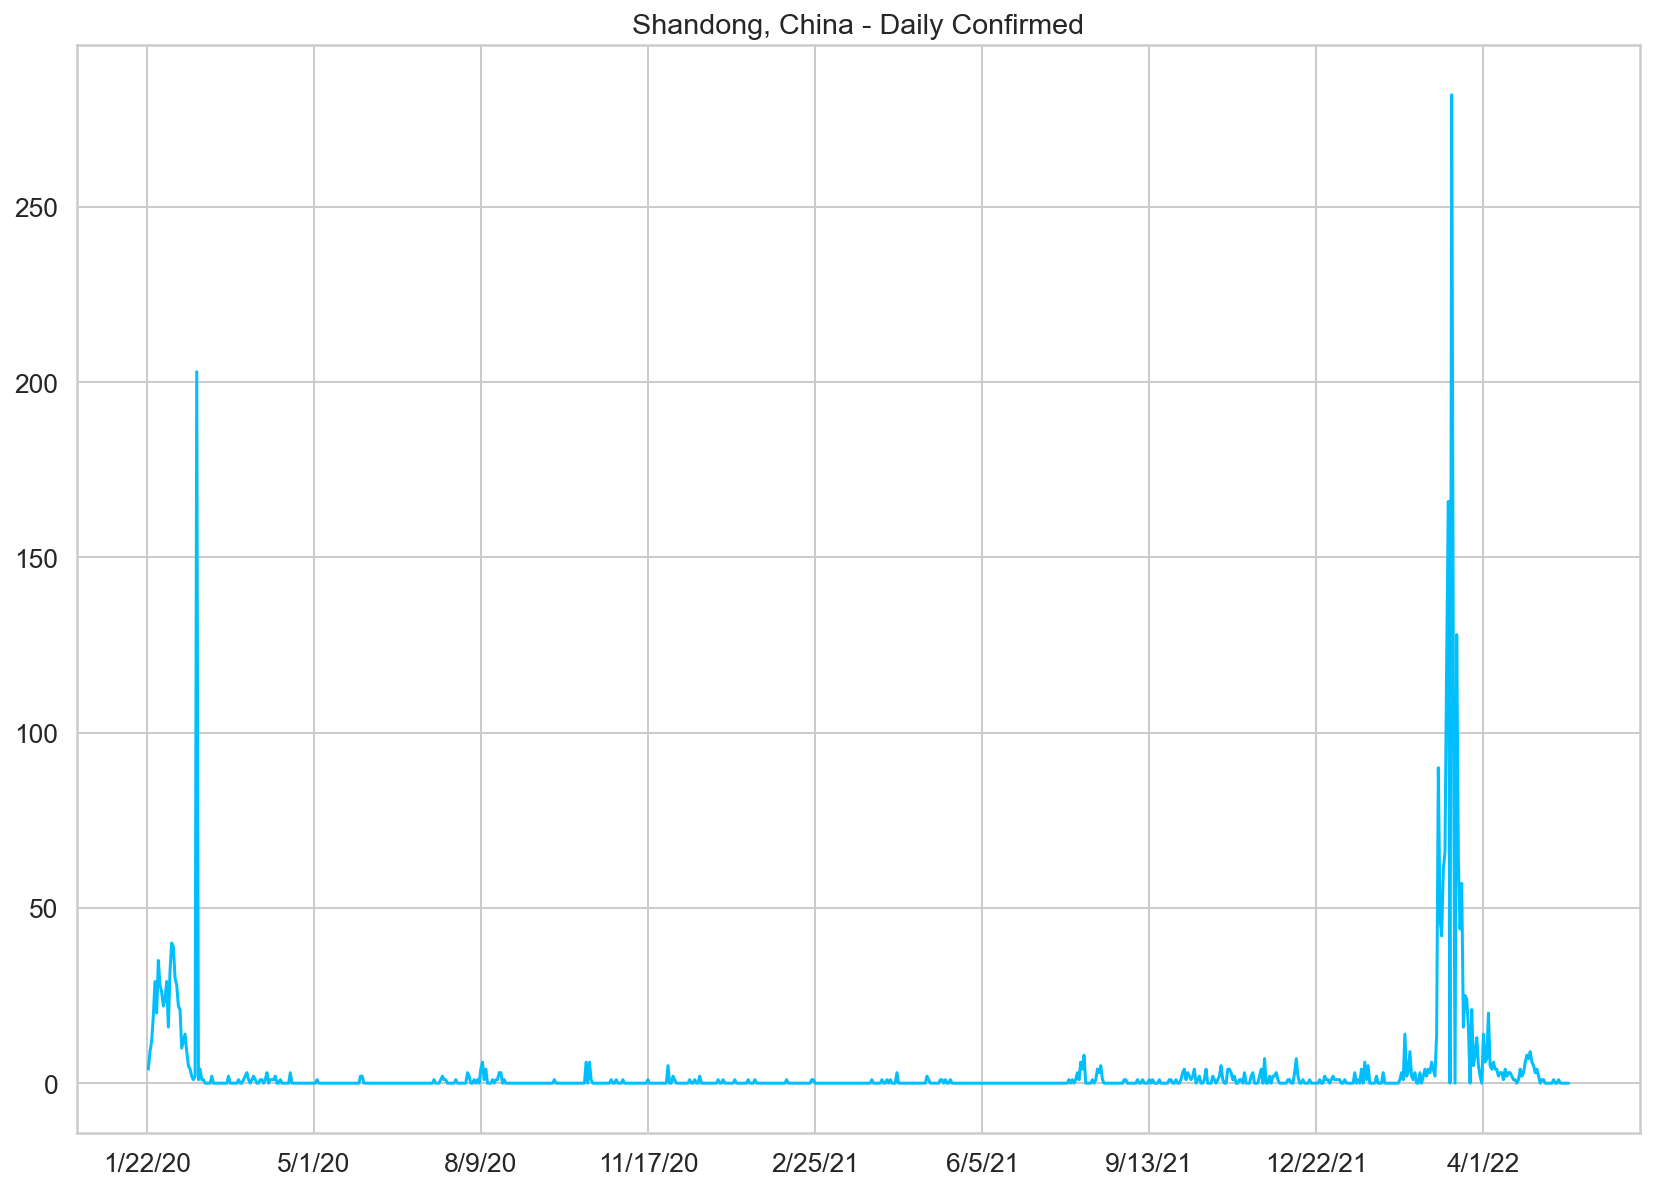

In [27]:
fig, ax = plt.subplots(1,1)
y1 = data.loc[index].diff()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.plot(y1)
plt.title("{}, {} - Daily Confirmed".format(state.loc[index], country.loc[index]))

plt.show()